In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!unzip "./drive/MyDrive/Dataset/olist ds.zip" -d "./"

Archive:  ./drive/MyDrive/Dataset/olist ds.zip
  inflating: ./olist_customers_dataset.csv  
  inflating: ./olist_geolocation_dataset.csv  
  inflating: ./olist_order_items_dataset.csv  
  inflating: ./olist_order_payments_dataset.csv  
  inflating: ./olist_order_reviews_dataset.csv  
  inflating: ./olist_orders_dataset.csv  
  inflating: ./olist_products_dataset.csv  
  inflating: ./olist_sellers_dataset.csv  
  inflating: ./product_category_name_translation.csv  


In [ ]:
olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

# OLIST CUSTOMERS

In [ ]:
# Kita coba untuk proses satu2

In [ ]:
# customer_id itu untuk foreign key ke order
# customer_unique_id itu untuk ID masing2 orang
olist_customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
olist_customers.shape

(99441, 5)

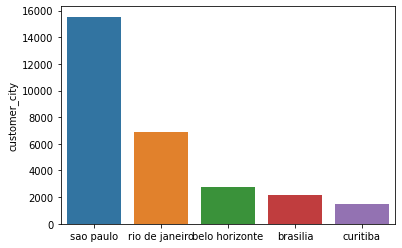

In [ ]:
# Menampilkan grafik 5 kota terbanyak
# olist_customers['customer_city'].value_counts().head().plot(kind='bar')

sns.barplot(x=olist_customers['customer_city'].value_counts().head().index, y=olist_customers['customer_city'].value_counts().head())


# OLIST Order Items

In [ ]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


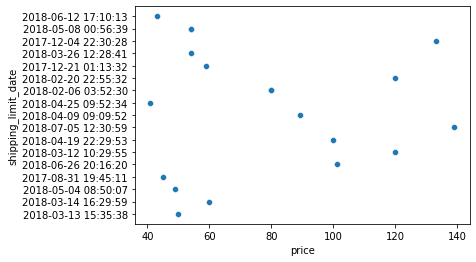

In [ ]:
sns.scatterplot(data=olist_order_items_dataset.value_counts().head(20), x="price", y="shipping_limit_date")

In [ ]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
olist_order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
olist_order_items_dataset.shape

(112650, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347aa19350>,
      dtype=object)

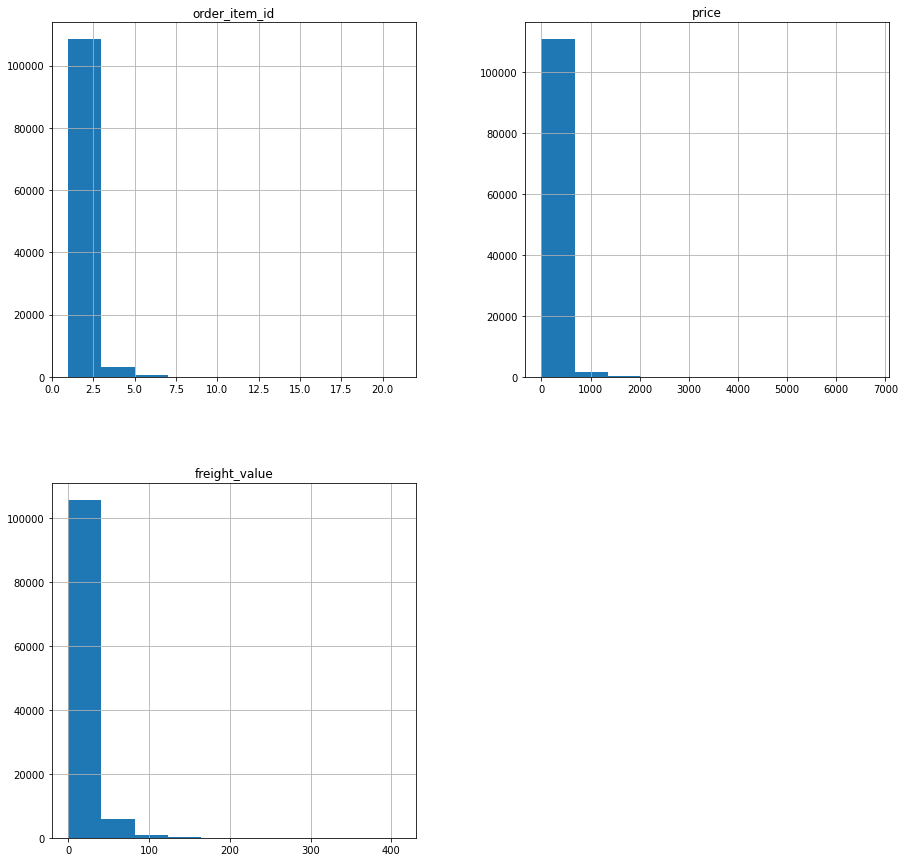

In [ ]:
# Cari penyebaran data nya
olist_order_items_dataset.hist(figsize=(15,15))

# Cek Order Reviews

In [ ]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
olist_order_reviews_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
olist_order_reviews_dataset.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347a7d30d0>]],
      dtype=object)

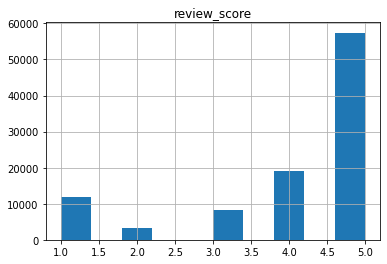

In [ ]:
olist_order_reviews_dataset.hist()

# Analisis Cluster Geolocation dataset

In [ ]:
olist_geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [ ]:
olist_geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


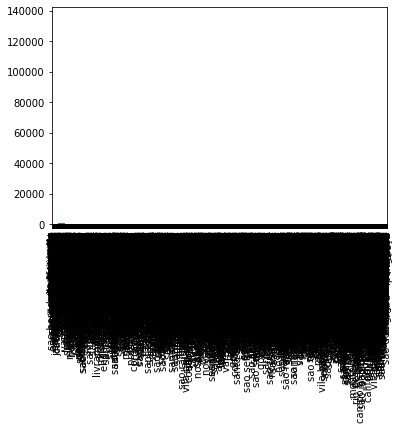

In [ ]:
olist_geolocation_dataset['geolocation_city'].value_counts().head(10000).plot(kind='bar')

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     \ 149.4MB 448kB/s
     |████████████████████████████████| 6.6MB 4.0MB/s 
     |████████████████████████████████| 225kB 38.9MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759610 sha256=8f1ec93ab5693ff5c658360152b0e77e7e08fcf1d1f781c85d25de2c412efafa
  Stored in directory: /tmp/pip-ephem-wheel-cache-j6sjmkql/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl 

In [ ]:
temp = olist_geolocation_dataset.head(50000).copy()
temp

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
49995,3279,-23.585770,-46.541929,sao paulo,SP
49996,3225,-23.583674,-46.554661,sao paulo,SP
49997,3227,-23.585579,-46.571355,sao paulo,SP
49998,3210,-23.601086,-46.549278,sao paulo,SP


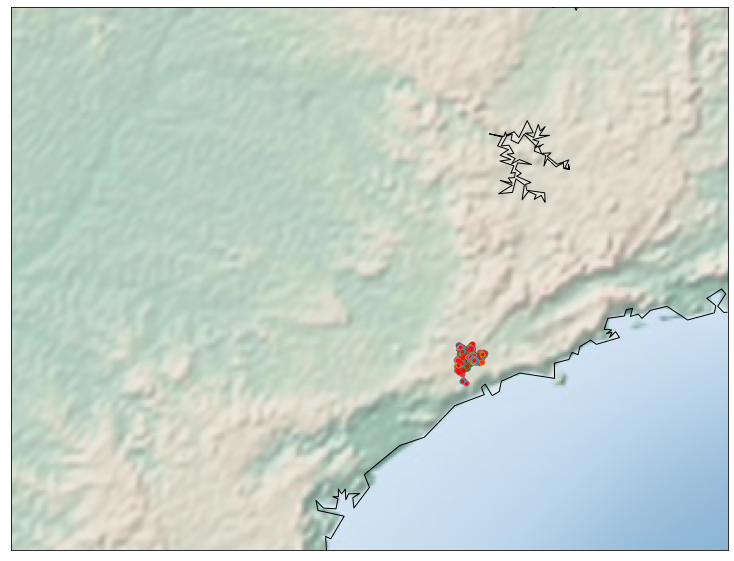

In [ ]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# Ini untuk Benua Brazil
# llon=-77
# ulon=-32
# llat=-35
# ulat=7

# Ini untuk Sao Paolo
llat=-26
ulat=-19
llon=-53
ulon=-43

# temp = temp[(temp['geolocation_lng'] > llon) & (temp['geolocation_lng'] < ulon) & (temp['geolocation_lat'] > llat) &(temp['geolocation_lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        
# temp

xs, ys = my_map(np.asarray(temp.geolocation_lng), np.asarray(temp.geolocation_lat))
temp['xm']= xs.tolist()
temp['ym'] =ys.tolist()

#Visualization1
for index,row in temp.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



# Olist Order Payment

In [ ]:
olist_order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
olist_order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
olist_order_payments_dataset['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

# Olist Order Reviews

In [ ]:
review_item_merge = olist_order_reviews_dataset.merge(olist_order_items_dataset, on="order_id", how="outer")

In [ ]:
review_item_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114100 entries, 0 to 114099
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                114100 non-null  object 
 1   order_id                 114100 non-null  object 
 2   review_score             114100 non-null  int64  
 3   review_comment_title     13714 non-null   object 
 4   review_comment_message   49135 non-null   object 
 5   review_creation_date     114100 non-null  object 
 6   review_answer_timestamp  114100 non-null  object 
 7   order_item_id            113322 non-null  float64
 8   product_id               113322 non-null  object 
 9   seller_id                113322 non-null  object 
 10  shipping_limit_date      113322 non-null  object 
 11  price                    113322 non-null  float64
 12  freight_value            113322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 12.2+ MB


In [ ]:
# Median
price_median = olist_order_items_dataset['price'].median()
price_median

74.99

In [ ]:
review_item_merge['price'] = review_item_merge['price'].fillna(74.99)

In [ ]:
review_item_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114100 entries, 0 to 114099
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                114100 non-null  object 
 1   order_id                 114100 non-null  object 
 2   review_score             114100 non-null  int64  
 3   review_comment_title     13714 non-null   object 
 4   review_comment_message   49135 non-null   object 
 5   review_creation_date     114100 non-null  object 
 6   review_answer_timestamp  114100 non-null  object 
 7   order_item_id            113322 non-null  float64
 8   product_id               113322 non-null  object 
 9   seller_id                113322 non-null  object 
 10  shipping_limit_date      113322 non-null  object 
 11  price                    114100 non-null  float64
 12  freight_value            113322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 12.2+ MB


# Feature Engineering

User Features
1.   Location
2.   Last Purchased
3.   Buying Power (Average price of product a user can buy)

Item Features
1.   Price
2.   Average Rating
3.   Product Category
4.   Dimension
5.   Weight

Goal

User - Item - Review





# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [ ]:
def read_data(f):
  return pd.read_csv(f)

In [ ]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
df_products_dataset = pd.read_csv('olist_products_dataset.csv')
df_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
df_product_mapping = pd.read_csv('product_category_name_translation.csv')

# Gather User - Item - Review

In [ ]:
temp_table_order_review = df_orders_dataset.merge(df_order_reviews_dataset, on="order_id")

In [ ]:
temp_table_order_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [ ]:
print("Sebelum Join : ",df_orders_dataset.shape)
print("Sesudah Join :",temp_table_order_review.shape)

Sebelum Join :  (99441, 8)
Sesudah Join : (100000, 14)


Dari hasil diatas, mungkin ada 
**One order_id may have more than one review_id**

# Remove duplicate review per order 

In [ ]:
order_review_unique = temp_table_order_review.groupby('order_id')['review_id'].nunique(). \
                      reset_index(name='unique_review_id'). \
                      sort_values("unique_review_id", ascending = False, ignore_index= True)

In [ ]:
order_review_unique[order_review_unique["unique_review_id"] > 1].head(10)

,order_id,unique_review_id
0,c88b1d1b157a9999ce368f218a407141,3
1,8e17072ec97ce29f0e1f111e598b0c85,3
2,03c939fd7fd3b38f8485a0f95798f1f6,3
3,df56136b8031ecd28e200bb18e6ddb2e,3
4,c63031aab37b1beb849bb4856afd4f13,2
5,629a311d2d78caf11bd453dd536c6da2,2
6,329aacec1c0231ed21bb1e2f8f4dc1e0,2
7,8b3c2785144e72ccba9b0213f0f1cd1e,2
8,1a3ccc1695931b2cb7a95065e0c81e4b,2
9,2e84df8fa5a2f0d5eab815d6c157b1f3,2


In [ ]:
# pilih 1 id untuk cek kenapa duplicate
temp_table_order_review[temp_table_order_review['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37370,c88b1d1b157a9999ce368f218a407141,ae0fb7b01c548c4fd30f19f55453ec4a,delivered,2017-07-17 22:44:23,2017-07-18 22:50:12,2017-07-20 15:27:41,2017-07-21 17:06:30,2017-08-01 00:00:00,ffb8cff872a625632ac983eb1f88843c,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
37371,c88b1d1b157a9999ce368f218a407141,ae0fb7b01c548c4fd30f19f55453ec4a,delivered,2017-07-17 22:44:23,2017-07-18 22:50:12,2017-07-20 15:27:41,2017-07-21 17:06:30,2017-08-01 00:00:00,202b5f44d09cd3cfc0d6bd12f01b044c,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
37372,c88b1d1b157a9999ce368f218a407141,ae0fb7b01c548c4fd30f19f55453ec4a,delivered,2017-07-17 22:44:23,2017-07-18 22:50:12,2017-07-20 15:27:41,2017-07-21 17:06:30,2017-08-01 00:00:00,fb96ea2ef8cce1c888f4d45c8e22b793,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


Dari sini kita bisa ambil saja yang paling terbaru

In [ ]:
temp_table_order_review = temp_table_order_review.sort_values('review_answer_timestamp', ascending=False).drop_duplicates(['order_id'])
temp_table_order_review.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
54623,30a2f24dd6770c91faa6b3481319204b,de2d4a479a79d4d85c9ce01caf804937,delivered,2018-08-08 11:48:41,2018-08-09 03:44:51,2018-08-09 14:17:00,2018-08-13 21:32:07,2018-08-15 00:00:00,13548d0f62b03a0d3cb6efc00877fa13,5,NaN,NaN,2018-08-14 00:00:00,2018-10-29 12:27:35
87833,7e8072dc0f35ebb0c1b2a4743e0f179a,8a8476a80099f2b63c573d23679532ec,delivered,2018-06-27 14:07:03,2018-06-28 20:10:14,2018-06-29 08:25:00,2018-07-11 00:12:50,2018-07-27 00:00:00,728d5cfdc7283cfd0a8061d7581a19f8,5,NaN,NaN,2018-07-12 00:00:00,2018-10-26 21:36:41


In [ ]:
print("Sebelum Join : ",df_orders_dataset.shape)
print("Sesudah Join :",temp_table_order_review.shape)

Sebelum Join :  (99441, 8)
Sesudah Join : (99441, 14)


**TIP ketika join tables untuk ambil semua kolom yang bagus, rapikan smua feature penting nya**

In [ ]:
temp_table_order_review.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [ ]:
# Ambil fitur penting
df_order_review = temp_table_order_review[['order_id','customer_id','review_score']].copy()
df_order_review.head()

,order_id,customer_id,review_score
54623,30a2f24dd6770c91faa6b3481319204b,de2d4a479a79d4d85c9ce01caf804937,5
87833,7e8072dc0f35ebb0c1b2a4743e0f179a,8a8476a80099f2b63c573d23679532ec,5
51645,7ce4e38f4eadd993bb5b2e60bb7f7bec,945ff008560255cc327d509beeefb54f,5
27726,99e4a1f9377bf28f08f54a2eecccbf0d,e7aa4699c1185ffeb66ec319049b09e1,5
30236,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,5


# Get Product ID

In [ ]:
df_order_review.head()

,order_id,customer_id,review_score
54623,30a2f24dd6770c91faa6b3481319204b,de2d4a479a79d4d85c9ce01caf804937,5
87833,7e8072dc0f35ebb0c1b2a4743e0f179a,8a8476a80099f2b63c573d23679532ec,5
51645,7ce4e38f4eadd993bb5b2e60bb7f7bec,945ff008560255cc327d509beeefb54f,5
27726,99e4a1f9377bf28f08f54a2eecccbf0d,e7aa4699c1185ffeb66ec319049b09e1,5
30236,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,5


In [ ]:
df_order_items_dataset.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [ ]:
temp_table_order_review_item = df_order_review.merge(df_order_items_dataset)
temp_table_order_review_item.head(1)

,order_id,customer_id,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,30a2f24dd6770c91faa6b3481319204b,de2d4a479a79d4d85c9ce01caf804937,5,1,ebb12274522d82caa7dca657873b2ad7,fffd5413c0700ac820c7069d66d98c89,2018-08-14 03:44:51,99.8,39.78


In [ ]:
# cek lagi unik value dari order id dari awal dan hasil join
print("unik order ID dari tabel awal : ", df_order_items_dataset['order_id'].nunique())
print("unik order ID dari tabel final : ", temp_table_order_review_item['order_id'].nunique())
print("shape dari tabel final : ", temp_table_order_review_item.shape)

unik order ID dari tabel awal :  98666
unik order ID dari tabel final :  98666
shape dari tabel final :  (112650, 9)


In [ ]:
# dari atas kita tau bahwa 1 order_id  dapat mempunyai banyak item
df_order_review_item = temp_table_order_review_item[['order_id','customer_id','product_id','review_score','price']].copy()

In [ ]:
# clean duplicate
df_order_review_item = df_order_review_item.drop_duplicates()
